In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.stats import norm
from tqdm.auto import tqdm

import sys
sys.path.append('../utils')
from utils import *
from data_retrieve import retrieve_bond

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
df = retrieve_bond()
df

,Date,df_1w,df_1m,df_2m,df_3m,df_6m,df_1y,df_2y
0,2024-11-06,0.700,0.910,0.790,0.470,0.440,0.42,0.282
1,2024-11-05,0.805,0.785,0.900,0.615,0.605,0.70,0.353
2,2024-11-04,0.880,0.785,0.900,0.615,0.595,0.70,0.280
3,2024-11-01,0.845,0.795,0.865,0.615,0.595,0.70,0.290
4,2024-10-31,0.835,0.775,0.865,0.655,0.625,0.71,0.359
...,...,...,...,...,...,...,...,...
461,2023-01-09,0.830,0.850,0.900,0.870,1.080,1.48,1.170
462,2023-01-06,0.830,0.850,0.900,0.870,1.080,1.48,1.177
463,2023-01-05,0.830,0.850,0.900,0.870,1.080,1.49,1.220
464,2023-01-04,0.830,0.840,0.900,0.800,1.040,1.49,1.192


1.0121105821995093


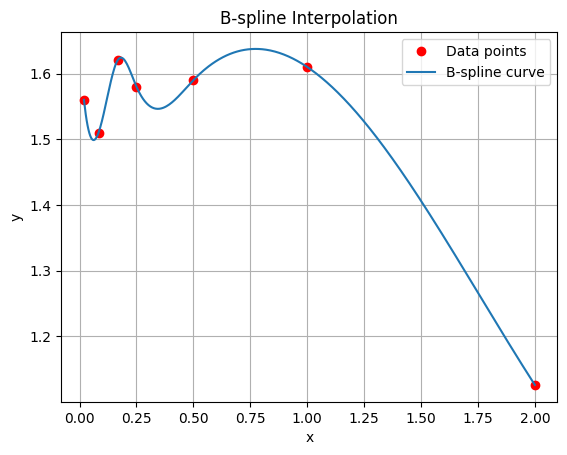

In [20]:
from scipy.interpolate import CubicSpline

def interpolate_rate(df, date):
    df_filter = df[df['Date']==date].drop(columns='Date')
    x = [1/52, 1/12, 2/12, 3/12, 6/12, 1, 2]
    y = df_filter.values.flatten()

    spline = CubicSpline(x, y)

    x_smooth = np.linspace(min(x), max(x), 504)
    y_smooth = spline(x_smooth)

    print(spline(0) / spline(1/252))


    plt.plot(x, y, 'o', label='Data points', color='red')
    plt.plot(x_smooth, y_smooth, label='B-spline curve')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('B-spline Interpolation')
    plt.grid(True)
    plt.show()

interpolate_rate(df, '2024-01-03')